In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Load the diabetes dataset
diabetes = pd.read_csv('diabetesNHANES.csv')
diabetes.head()

,SEQN,diabetes,glucose,insulin,cholesterol,outcome,systolic,diastolic
0,93742,yes,5.88,25.83,160,1,90,167
1,93758,yes,7.05,5.42,446,1,77,149
2,93759,yes,4.05,6.98,76,1,62,117
3,93762,yes,6.27,15.81,277,1,63,128
4,93766,yes,4.44,13.25,254,1,107,150


In [3]:
# take a random sample of 50 instances
df = diabetes.sample(n=50, random_state=1234)
df.head()

,SEQN,diabetes,glucose,insulin,cholesterol,outcome,systolic,diastolic
1326,101937,no,5.38,30.01,157,0,80,135
208,98270,yes,5.44,3.82,148,1,73,151
358,102289,yes,5.50,31.22,193,1,62,105
930,97041,no,5.05,11.27,134,0,69,104
319,101046,yes,8.55,13.52,105,1,69,137


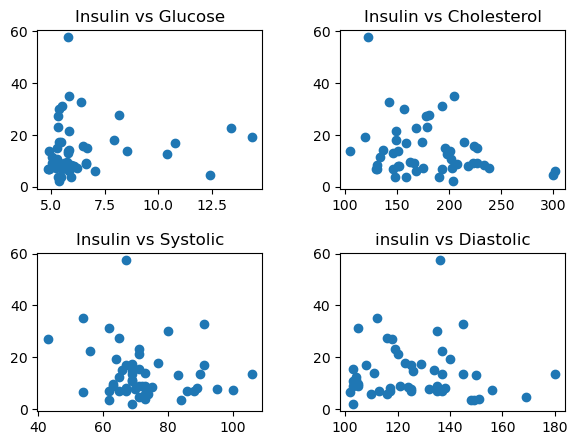

In [4]:
# Plot Insulin vs Glucose, Cholesterol, Systolic BP, and Diastolic BP
fig, axis = plt.subplots(2, 2)
fig.tight_layout(pad=2.5)
axis[0, 0].scatter(df[['glucose']], df[['insulin']])
axis[0, 0].set_title("Insulin vs Glucose")

axis[0, 1].scatter(df[['cholesterol']], df[['insulin']])
axis[0, 1].set_title("Insulin vs Cholesterol")

axis[1, 0].scatter(df[['systolic']], df[['insulin']])
axis[1, 0].set_title("Insulin vs Systolic")

axis[1, 1].scatter(df[['diastolic']], df[['insulin']])
axis[1, 1].set_title("insulin vs Diastolic")

plt.show()

In [5]:
# Define input and output features
X = df[['glucose', 'cholesterol', 'systolic', 'diastolic']].values.reshape(-1, 4)
y = df[['insulin']].values.reshape(-1, 1)

In [6]:
# Initialize and fit a multiple linear regression model
mlrModel = LinearRegression()
mlrModel.fit(X,y)

LinearRegression()

In [7]:
# Predicted values for the multiple regression model
mlrPred = mlrModel.predict(X)

# Calculate regression metrics for the multiple regression model
print('MAE:', metrics.mean_absolute_error(y, mlrPred))
print('MSE:', metrics.mean_squared_error(y, mlrPred))
print('RMSE:', metrics.mean_squared_error(y, mlrPred, squared=False))
print('R-squared:', metrics.r2_score(y, mlrPred))

MAE: 7.056702874397803
MSE: 93.33760482434342
RMSE: 9.66113889892612
R-squared: 0.10990366178571265


In [9]:
# Scale the input features
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

# Initialize and fit a k-nearest neighbors regression model with k=7 neighbors
knnModel = KNeighborsRegressor(n_neighbors=7)
knnModel.fit(Xscaled,y)

# NOTE:
# The k-nearest neighbors regression model with k=5 
# performs better compared to the model with 
 based on the regression metrics 
 and 
. 

KNeighborsRegressor(n_neighbors=7)

In [9]:
# Predicted values for the k-nearest neighbors regression model
knnPred = knnModel.predict(Xscaled)

# Calculate regression metrics for the k-nearest neighbors regression model
print('MAE:', metrics.mean_absolute_error(y, knnPred))
print('MSE:', metrics.mean_squared_error(y, knnPred))
print('RMSE:', metrics.mean_squared_error(y, knnPred, squared=False))
print('R-squared:', metrics.r2_score(y, knnPred))

MAE: 7.116714285714286
MSE: 97.38447057142855
RMSE: 9.868357035060525
R-squared: 0.0713114953217856
